# Project 2 _ Analysis sales data
- by: Trang Ngo
- reference: Nguyen Ha DS

In [128]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
plt.style.use("ggplot")

# set default for charts
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('figure', figsize = (8,6))

In [129]:
# working with directories
import os

In [130]:
path = "E:/Users/TRANG/Downloads/Project 2 data"
os.listdir(path)

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [131]:
files = [file for file in os.listdir(path) ]

# Concat all the csv file
year_data = pd.DataFrame()
path = "E:/Users/TRANG/Downloads/Project 2 data"

for file in files:
    df = pd.read_csv(path + "/" + file)
    year_data = pd.concat([year_data, df], axis= "rows")  # hoặc 0 vì 0=rows

# save for later use
year_data.to_csv("Year-data.csv", index = False) # không cần index, true thì giữ index

In [132]:
year_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [133]:
# Read year data
df_raw = pd.read_csv("Year-data.csv")
# df_raw.head()

In [134]:
# Create a backup for raw df
df = df_raw.copy()

In [135]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [137]:
df.describe(include = "object")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [138]:
df.columns
columns = [col for col in df.columns]
columns

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [139]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# 1. What was the best month for sales? How much was earned that month?

In [140]:
# Create month columns
df["Month"] = df["Order Date"].str[0:2]

In [141]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [142]:
df["Month"].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

In [143]:
# cải Or không biết là gì, nên hỏi người liên quan

In [144]:
# Đi xử lý NaN value
cond_na = df.isna().any(axis=1)

In [145]:
df[cond_na].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df.dropna(inplace = True)

In [147]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [148]:
df[cond_na].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [149]:
# Đi xử lý "or" trong  months
cond_or = (df["Month"] != "Or")
df = df[cond_or]

In [150]:
df["Month"].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: Month, dtype: int64

In [151]:
type(df["Month"].iloc[0])

str

In [152]:
# Convert month in str to month in int
df["Month"] = df["Month"].astype("int64")

In [153]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Now Calculate Sales

In [154]:
# Nếu chưa xử lý NaN Value thì chuyển từ str sang số sẽ có lỗi

In [155]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [156]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 12.8+ MB


In [158]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [159]:
sales_by_month = df.groupby("Month").sum()

In [160]:
# sau group by nên reset index
sales_by_month.reset_index(inplace=True)

In [161]:
sales_by_month.head()

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1.811768e+06,1.822257e+06
1,2,13449,2.188885e+06,2.202022e+06
2,3,17005,2.791208e+06,2.807100e+06
3,4,20558,3.367671e+06,3.390670e+06
4,5,18667,3.135125e+06,3.152607e+06


In [162]:
sales_by_month["Sales"].argmax()

11

In [163]:
print("The best month for sales is: {}".format((sales_by_month["Sales"].argmax() + 1)))
print("Sales of month 12 is: {} USD".format(sales_by_month["Sales"].max()))

The best month for sales is: 12
Sales of month 12 is: 4613443.340001534 USD


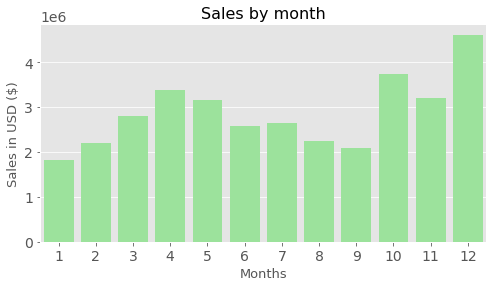

In [164]:
x = sales_by_month["Month"]
y = sales_by_month["Sales"]

plt.figure(figsize = (8,4))

sns.barplot(x, y, color = "lightgreen")

plt.title("Sales by month", fontsize = 16)
plt.xlabel("Months", fontsize = 13)
plt.ylabel("Sales in USD (\$)", fontsize = 13)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# 2. What city sale the most products?

In [165]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9,11.95


In [166]:
df["Purchase Address"].loc[186849]

'250 Meadow St, San Francisco, CA 94016'

In [167]:
'250 Meadow St, San Francisco, CA 94016'.split(",")[1].strip()

'San Francisco'

In [168]:
def getCity(address):
    return address.split(",")[1].strip()

In [169]:
df["City"] = df["Purchase Address"].apply(getCity)

In [170]:
df["City"].value_counts()

San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: City, dtype: int64

In [171]:
sales_by_city = df.groupby(by = "City").sum() # a new table

In [172]:
sales_by_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


In [173]:
sales_by_city.index

Index(['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City',
       'Portland', 'San Francisco', 'Seattle'],
      dtype='object', name='City')

In [174]:
sales_by_city.columns

Index(['Quantity Ordered', 'Price Each', 'Month', 'Sales'], dtype='object')

In [175]:
cities=['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City',
       'Portland', 'San Francisco', 'Seattle']

In [176]:
indexCity = sales_by_city["Sales"].argmax()

In [177]:
indexCity # order of the biggest sales city

7

In [178]:
print("The city with the highest sale is: {}".format(cities[indexCity]))

The city with the highest sale is: San Francisco


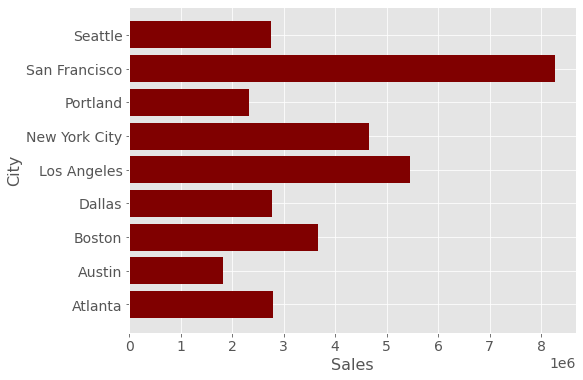

In [185]:
x = sales_by_city.index
y = sales_by_city["Sales"]

plt.barh(x, y, color = "maroon")  # bar chart

#set title, label; have set sizes at the beginning
plt.xticks()
plt.xlabel("Sales")
plt.ylabel("City")
#show plot
plt.show()

# 3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [188]:
df["Hour"] = pd.to_datetime(df["Order Date"]).dt.hour

In [187]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9,11.95,San Francisco,0


In [197]:
groupedByHourSum = df.groupby(by = "Hour").sum()

In [210]:
groupedByHour = df.groupby(by = "Hour").count()

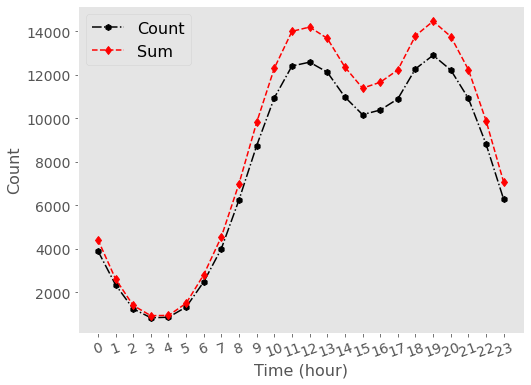

In [225]:
# Drawing count order by hour

x = groupedByHour.index
y = groupedByHour["Quantity Ordered"]
z = groupedByHourSum["Quantity Ordered"]

fig, ax= plt.subplots()

# draw two axis => but make it one
ax.plot(x, y, "kh-.", label = "Count") # kh là màu đen
ax.plot(x, z, "rd--", label = "Sum") # rd là màu đỏ

plt.xlabel("Time (hour)")
plt.ylabel("Count")

plt.xticks(x, rotation =20)

plt.legend(loc = 2, fontsize = 16, frameon=True) # loc: chuyển vị trí thuyết minh
plt.grid() # lưới  # tại sao code lưới vào thì không hiện lưới?
plt.show()

# 4. What products are most often sold together?¶

In [226]:
df.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,7
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,10
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,10
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston,14


In [227]:
condDuplicatedID = df["Order ID"].duplicated(keep = False)

In [228]:
duplicated_df = df[condDuplicatedID]

In [231]:
duplicated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14649 entries, 3 to 186842
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          14649 non-null  object 
 1   Product           14649 non-null  object 
 2   Quantity Ordered  14649 non-null  int64  
 3   Price Each        14649 non-null  float64
 4   Order Date        14649 non-null  object 
 5   Purchase Address  14649 non-null  object 
 6   Month             14649 non-null  int64  
 7   Sales             14649 non-null  float64
 8   City              14649 non-null  object 
 9   Hour              14649 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.2+ MB


In [232]:
# Create a function to join product with same Order ID
def connectProduct(product):
    return ", ".join(product)

In [241]:
duplicated_df["Grouped Products"] = duplicated_df.groupby("Order ID")["Product"].transform(connectProduct) 
#transform only work with a single series

In [242]:
duplicated_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped Products
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones, Bose SoundSport He..."
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone, USB-C Charging Cable"


In [243]:
duplicated_index = duplicated_df["Order ID"].drop_duplicates().index

In [244]:
groupedProducts = duplicated_df.loc[duplicated_index, "Grouped Products"]

In [245]:
groupedProducts.value_counts()

iPhone, Lightning Charging Cable                                882
Google Phone, USB-C Charging Cable                              856
iPhone, Wired Headphones                                        361
Vareebadd Phone, USB-C Charging Cable                           312
Google Phone, Wired Headphones                                  303
                                                               ... 
Google Phone, USB-C Charging Cable, Wired Headphones, iPhone      1
LG Washing Machine, Apple Airpods Headphones                      1
27in 4K Gaming Monitor, LG Dryer                                  1
LG Washing Machine, 27in 4K Gaming Monitor                        1
iPhone, Lightning Charging Cable, 27in 4K Gaming Monitor          1
Name: Grouped Products, Length: 366, dtype: int64

In [246]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in groupedProducts:
    row_list = row.split(", ")
    count.update(Counter(combinations(row_list, 2)))

# xuất kết quả ra
for key, value in count.most_common(10):
    print(f"{key[0]} and {key[1]} have {value} times soled together")

iPhone and Lightning Charging Cable have 1005 times soled together
Google Phone and USB-C Charging Cable have 987 times soled together
iPhone and Wired Headphones have 447 times soled together
Google Phone and Wired Headphones have 414 times soled together
Vareebadd Phone and USB-C Charging Cable have 361 times soled together
iPhone and Apple Airpods Headphones have 360 times soled together
Google Phone and Bose SoundSport Headphones have 220 times soled together
USB-C Charging Cable and Wired Headphones have 160 times soled together
Vareebadd Phone and Wired Headphones have 143 times soled together
Lightning Charging Cable and Wired Headphones have 92 times soled together


# 5. What product sold the most? Why do you think it sold the most?¶

In [247]:
groupedByProduct = df.groupby("Product").sum()

In [258]:
groupedByProduct ["Quantity Ordered"]

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [251]:
# Assumption: Lý do sản phẩm bán được nhiều nhất
# Một là do giá rẻ
# Hai là do bán chung với sản phẩm giá đắt

In [252]:
groupedByProductMinPrice = df.groupby("Product").min()

In [259]:
groupedByProductMinPrice

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Product,,,,,,,,,
20in Monitor,141289,1,109.99,01/01/19 12:50,"1 Dogwood St, Dallas, TX 75001",1,109.99,Atlanta,0
27in 4K Gaming Monitor,141240,1,389.99,01/01/19 10:02,"1 4th St, Boston, MA 02215",1,389.99,Atlanta,0
27in FHD Monitor,141237,1,149.99,01/01/19 09:08,"1 7th St, Los Angeles, CA 90001",1,149.99,Atlanta,0
34in Ultrawide Monitor,141311,1,379.99,01/01/19 07:24,"1 9th St, Dallas, TX 75001",1,379.99,Atlanta,0
AA Batteries (4-pack),141253,1,3.84,01/01/19 07:26,"1 14th St, San Francisco, CA 94016",1,3.84,Atlanta,0
AAA Batteries (4-pack),141239,1,2.99,01/01/19 05:53,"1 4th St, Dallas, TX 75001",1,2.99,Atlanta,0
Apple Airpods Headphones,141243,1,150.00,01/01/19 04:56,"1 12th St, Los Angeles, CA 90001",1,150.00,Atlanta,0
Bose SoundSport Headphones,141242,1,99.99,01/01/19 09:12,"1 14th St, New York City, NY 10001",1,99.99,Atlanta,0
Flatscreen TV,141248,1,300.00,01/01/19 09:58,"1 4th St, Atlanta, GA 30301",1,300.00,Atlanta,0


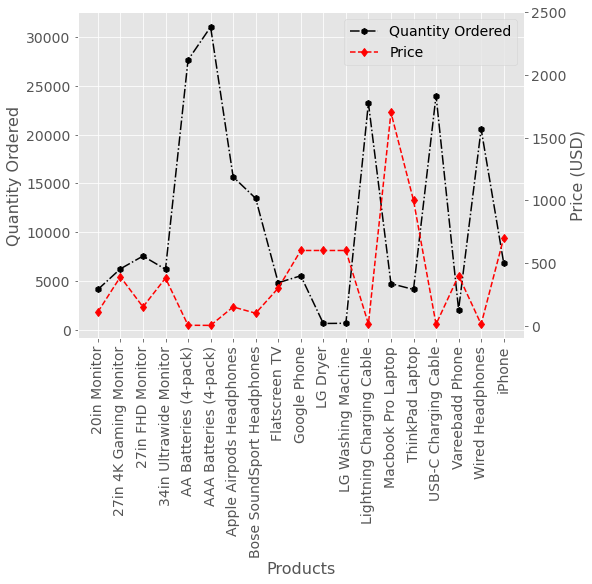

In [260]:
x = groupedByProduct.index

# Drawing count order by hour

x = groupedByProduct.index
y = groupedByProduct["Quantity Ordered"]
z = groupedByProductMinPrice["Price Each"]

# trục 1
fig, ax1 = plt.subplots()

# trục 2
ax2 = ax1.twinx()

# plot
lns1 = ax1.plot(x, y, "kh-.", label = "Quantity Ordered")
lns2 = ax2.plot(x, z, "rd--", label = "Price")

# set labels
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price (USD)")

ax1.set_xticklabels(x, rotation = 90)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, frameon = True, fontsize = 14)

ax2.set_ylim([-100,2500])
plt.grid()
plt.show()